## Using twitterscraper api, you can scrape tweets into a .json file directly from the commandline.
twitterscraper Kobe --limit 1000 -bd 2020-01-27 --lang en --output=kobenextday.json

In [1]:
from __future__ import print_function
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import Normalizer
from sklearn import metrics
from sklearn.cluster import KMeans, MiniBatchKMeans
import codecs, json
import sklearn
# Import all of the scikit learn stuff

import pandas as pd
import warnings
with codecs.open('kobe2.json','r','utf-8') as f:
    tweets = json.load(f, encoding = 'utf-8')   #loads file
import pandas as pd
df = pd.read_json('kobe2.json', encoding='utf-8') #creates the full dataframe using pandas
#print(df.head())  #debugging
d = df['text']  #creates a new dataframe with just the tweet contents
print(d.head(25))
print(d[0])
d[0] = 'Kobe is a hero basketball NBA shocking '
print(d[0])
d=d.drop_duplicates(keep='first', inplace=False)  #drop duplicates
d.head(25)
           
#dlikes = df['likes']  #creates a data frame with int number of likes per tweet
#d.to_csv(r'c:\data\pandas.txt', header=None, index=None, sep=' ', mode='a')  #exports tweets to a .txt


0     First NBA game I went to.. Kobe.. and he dropp...
1     Kobe Bryant  #BlackMamba\n\nGianna Bryant \n\n...
2     Watch @CBCNews's broadcast: Kobe Bryant killed...
3     People really in Lebron ig comments saying he ...
4     I totally Agree Mr President. What a huge loss...
5                @dotNoso predicted Kobe Bryant’s death
6     RIP KOBE BRYANT MY IDOL DIED.  https://twitter...
7     Goodbye Kobe. Rest in Peace. pic.twitter.com/U...
8                     I knew basketball because of Kobe
9     I grew up on Kobe , my first Alexandra fair .....
10    Heroes come and go but legends are forever. Th...
11                                    Kobe from the 90s
12                                   rest in peace kobe
13          This so sad about Kobe Bryant  and daughter
14    Every time they show the NBA reactions I just ...
15    GOD have Mercy!!!!\n\nRIP kobe Bryant,  Gianna...
16     Shocked!! RIP Kobe!! #nba #legend #BlackMambaRIP
17                       R.I.P. Kobe and His Dau

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0               Kobe is a hero basketball NBA shocking 
1     Kobe Bryant  #BlackMamba\n\nGianna Bryant \n\n...
2     Watch @CBCNews's broadcast: Kobe Bryant killed...
3     People really in Lebron ig comments saying he ...
4     I totally Agree Mr President. What a huge loss...
5                @dotNoso predicted Kobe Bryant’s death
6     RIP KOBE BRYANT MY IDOL DIED.  https://twitter...
7     Goodbye Kobe. Rest in Peace. pic.twitter.com/U...
8                     I knew basketball because of Kobe
9     I grew up on Kobe , my first Alexandra fair .....
10    Heroes come and go but legends are forever. Th...
11                                    Kobe from the 90s
12                                   rest in peace kobe
13          This so sad about Kobe Bryant  and daughter
14    Every time they show the NBA reactions I just ...
15    GOD have Mercy!!!!\n\nRIP kobe Bryant,  Gianna...
16     Shocked!! RIP Kobe!! #nba #legend #BlackMambaRIP
17                       R.I.P. Kobe and His Dau

In [2]:
with codecs.open('kobenextday.json','r','utf-8') as f:
    tweets = json.load(f, encoding = 'utf-8')   #loads new file
import pandas as pd
dfnew = pd.read_json('kobenextday.json', encoding='utf-8')
dnew = dfnew['text']
dnew=dnew.drop_duplicates(keep='first', inplace=False)
print(dnew.head(25))
dnewindex=dnew[0:1023]


0     Wow they’re giving out a free Kobe jersey to e...
1     next Tuesday, February 4 is senior Knight for ...
2     Good luck with that. The wounds are still too ...
3     24 shots in 8 minutes for kobe tonight? say less.
4     January was a tough year but we are almost don...
5          still not real...\nRIP KOBE , GIGI , NIPSEY 
6     A few years ago I told myself that I would tat...
7     Love that he remembers the exact score ... Hah...
8     I know. I've been loading up on reaction memes...
9     @Tigerfists88 #PeoplesChamp.!! Obama #p2 Biden...
10    Nothing but 3, 4, and 5XL’s left in Kobe jerse...
11    The way people respect Kobe off the strength o...
12    I’m not dwelling on no sad shit....even Kobe!!...
13    You think this funny??https://twitter.com/azaz...
14                                         Why Kobe man
15    8 henny shots in 24 seconds in honor of Kobe t...
16    My thoughts on Kobe https://twitter.com/ringer...
17    Had me messed up yesterday. Smh. Todavía n

In [3]:
with codecs.open('kobepresent.json','r','utf-8') as f:
    tweets = json.load(f, encoding = 'utf-8')   #loads new file
import pandas as pd
dfpresent = pd.read_json('kobepresent.json', encoding='utf-8')
dpresent = dfpresent['text']
dpresent=dpresent.drop_duplicates(keep='first', inplace=False)
print(dpresent.head(25))



0     At the vet. Kobe (cat) fell out 3rd story wind...
2     Watching Kobe Braynt on Jimmy Kimmel, channel ...
3     Kobe Bryant likes is a Harry Potter fan? I can...
4     Busy, tired morning. Finally getting around to...
5     completely stuffed after a massive kobe beef l...
6     Going to lunch at Kobe Japanese Steak House to...
7                            @jag Kobe and lobster.  :)
8     @rjchrhl So where does one order $100 steak? K...
9     got a haircut & the Zoom Kobe II's...Laker Col...
10                     Just finished eating Kobe with D
11    Following @VTWthrGrl's lead and having dinner ...
12                   About to enjoy some fabulous Kobe!
13    Kevin Garnet: "I didn’t really consider LA bec...
14    I`msorry to late reply.anyway,just I tell ya w...
15    @ramil well I would like to try Kobe and Wagyu...
16             @ Kobe Steakhouse getting a late dinner.
17          Lunch at Kobe, then a trip up to Bluefield.
18    Yahoo! News - everyday the newspaper - < p

## We can create a new dataframe with tweets containing certain phrases

In [4]:
#searches for tweets instances with desired string and creates new dataframe
data_filtered = d[d.str.contains('rapist')]
data_filtered.head()



572                     Convicted rapist Kobe Bryant lol
853                                   Was Kobe a rapist?
992    That seems like it’s between you and your ther...
Name: text, dtype: object

In [5]:
data_filtered_new = dnew[dnew.str.contains('rapist')]
data_filtered_new.head()

49      He wasn’t a rapist and it was never approved. ...
203     Why is it that you can say stuff like this but...
517                      Convicted rapist Kobe Bryant lol
647     He's a rapist based on what? Because he settle...
1107    Wouldn't you want the child molester or rapist...
Name: text, dtype: object

In [6]:
data_filtered_present = dpresent[dpresent.str.contains('rapist')]
data_filtered_present.head()

408    @NEEKlovePINK ...See u start every year ain't ...
Name: text, dtype: object

In [7]:
from collections import Counter
Counter(" ".join(df["text"]).split()).most_common(25) #most common words without stop words removal

[('the', 789),
 ('Kobe', 718),
 ('to', 497),
 ('and', 457),
 ('a', 352),
 ('of', 343),
 ('I', 312),
 ('in', 271),
 ('Bryant', 200),
 ('for', 198),
 ('that', 187),
 ('is', 183),
 ('…', 182),
 ('was', 176),
 ('you', 156),
 ('on', 152),
 ('his', 140),
 ('my', 134),
 ('be', 120),
 ('this', 107),
 ('with', 101),
 ('it', 100),
 ('about', 95),
 ('NBA', 91),
 ('he', 90)]

## Count Vectorizer is a handy tool from the ski kit learn package to quickly vectorize text data

In [8]:

import numpy as np
import sys
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# we set up our CountVectorizers arguments

# setup stop work list (to remove from docs)
stop_words = ['and','the','to','do','if', 'is','www','instagram','com','it','http', 'in','https','twitter','am','as','an','the','beause','he','a','of','i','who', 'to','one','at','will','from','sign','for','that','is','was','you','because','on','are','his','by','but','also','are''my','be','like','not','up','have','all','so','throbbing','just','about']
# setup n_gram ranges
ngram_range = (1, 1)
# drop words that show up 70% or more of the time
max_df = .7
# drop words that only show up less than 1% of the time
min_df = .001
max_features = 200
# initiates the count vectorizer
c = CountVectorizer(stop_words=stop_words, ngram_range=ngram_range, max_df=max_df, min_df=min_df, 
                    max_features=max_features, binary=True)
c1 = CountVectorizer(stop_words=stop_words, ngram_range=ngram_range, max_df=max_df, min_df=min_df, 
                    max_features=max_features, binary=True)
c2 = CountVectorizer(stop_words=stop_words, ngram_range=ngram_range, max_df=max_df, min_df=min_df, 
                    max_features=max_features, binary=True)
#discrete model if True
features = c.fit_transform(d)    #original set
features = features.toarray()
feature_names = c.get_feature_names()  
featuresnew = c1.fit_transform(dnew)
featuresnew = featuresnew.toarray()  #2 days after set
feature_names_new = c1.get_feature_names()
featurespresent = c2.fit_transform(dpresent)    #present set
featurespresent = featurespresent.toarray()
feature_names_present = c2.get_feature_names()
print(len(feature_names)) #number of words counted
print('\n')
print(features.shape) #size of matrix
print('\n')
print(features[20]) #example of matrix subsection
print('\n')
print(feature_names[0:20]) #You can index the words to view subsets
print('\n')
#print(feature_names) #every words in the matrix
print('\n')
print(feature_names_new[0:30])
print('\n')
print(feature_names_present[0:30])
np.set_printoptions(threshold=sys.maxsize) #view entire matrix
#print(features)

200


(980, 200)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


['2020', '24', 'after', 'always', 'around', 'away', 'back', 'basketball', 'beautiful', 'been', 'before', 'being', 'believe', 'better', 'bryant', 'can', 'change', 'chng', 'condolences', 'court']




['01', '2020', '24', 'after', 'again', 'ain', 'anything', 'around', 'ass', 'back', 'bad', 'basketball', 'been', 'before', 'being', 'believe', 'best', 'better', 'black', 'bro', 'bryant', 'bryants', 'can', 'change', 'chng', 'crash', 'damn', 'daughter', 'day', 'death']


['10', '100', '11', '18', 'after', 'again', 'ass', 'aston', 'back', 'ball', 'basketball', 'beef', 'been',

## Using our generated matrix, we can easily perform an exploratory analysis 

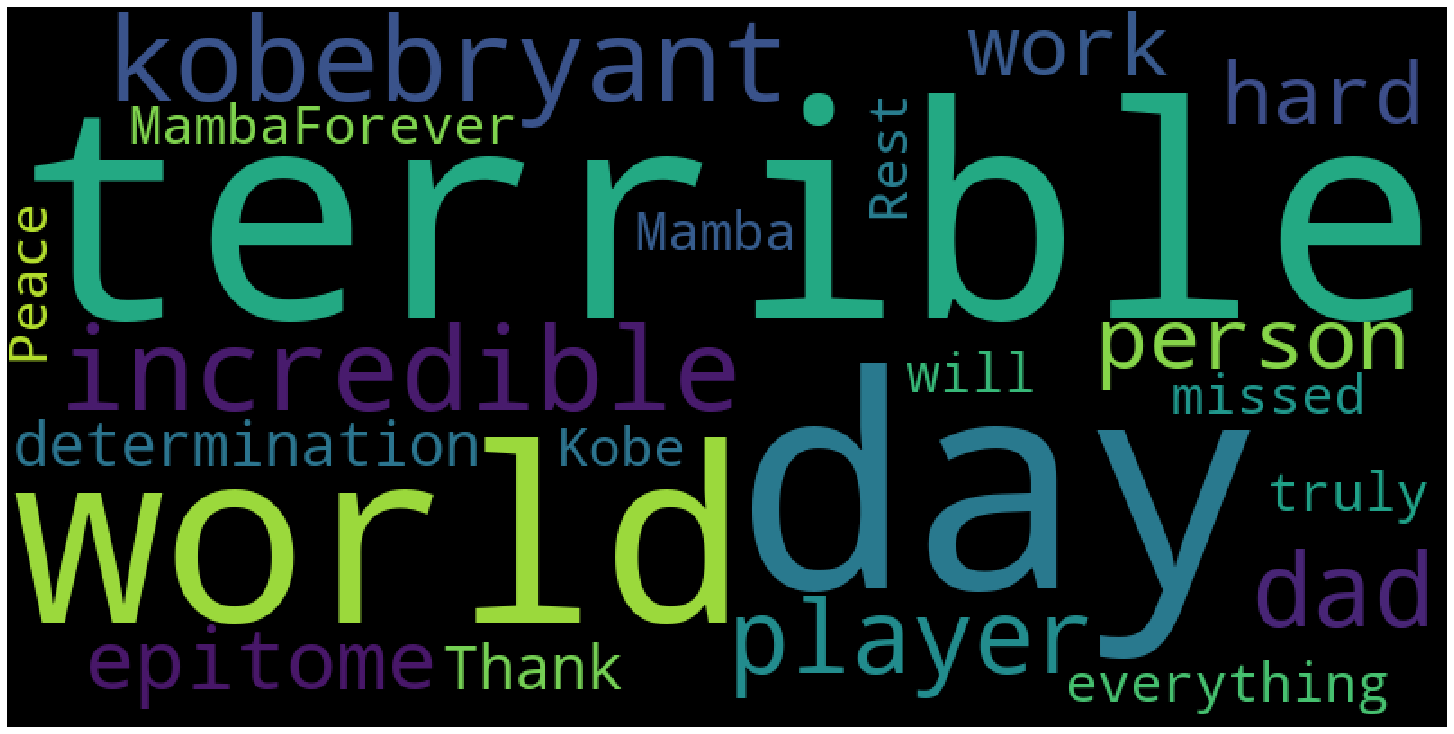

In [9]:
# Generate a word cloud based on frequency
%matplotlib inline
import os
from wordcloud import WordCloud
import matplotlib.pyplot as plt

word_string = d[100]
wordcloud = WordCloud(width=800, height=400).generate(word_string)
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [10]:
import plotly 
import cufflinks as cf
import plotly.graph_objs as go
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
#number of likes per tweet
fig = df['likes'].iplot(
    kind='hist',
    bins=1000,
    xTitle='likes',
    linecolor='black',
    yTitle='count',
    layout = go.Layout(xaxis=dict(range=[0, 20]),
    title='Tweet Like Distribution'))
fignew = dfnew['likes'].iplot(
    kind='hist',
    bins=1000,
    xTitle='likes',
    linecolor='black',
    yTitle='count',
    layout = go.Layout(xaxis=dict(range=[0, 20]),
    title='Tweet Like Distribution, 2 days after'))


In [11]:
df['word_count'] = d.apply(lambda x: len(str(x).split()))
#Average word count of tweets
df['word_count'].iplot(
    kind='hist',
    bins=100,
    xTitle='word count',
    linecolor='black',
    yTitle='count',
    layout = go.Layout(xaxis=dict(range=[0, 40]),
    title='Tweet Word Count Distribution'))

In [12]:
df['tweetlen'] = d.astype(str).apply(len)
df['tweetlen'].iplot(
    kind='hist',
    bins=500,
    xTitle='review length',
    linecolor='black',
    yTitle='count',
     layout = go.Layout(xaxis=dict(range=[0, 160]),
    title='Tweet Length Distribution'))

df['tweetlennew'] = dnew.astype(str).apply(len)
df['tweetlennew'].iplot(
    kind='hist',
    bins=500,
    xTitle='review length',
    linecolor='black',
    yTitle='count',
     layout = go.Layout(xaxis=dict(range=[0, 160]),
    title='Tweet Length Distribution'))


## By taking advantage of some built in methods, we can construct functions to find the most common 2 and 3 word phrases in order to notice trends in our corpus

In [13]:
def get_top_n_bigram(corpus, n=None): #most common 2 word phrases
    vec = CountVectorizer(ngram_range=(2, 2), stop_words=stop_words).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(d, 20)
for word, freq in common_words:
    print(word, freq)
bi = pd.DataFrame(common_words, columns = ['text' , 'count'])
bi.groupby('text').sum()['count'].sort_values(ascending=False).iplot(
kind='bar', yTitle='Count', linecolor='black', title='Top 20 bigrams after removing stop words')


kobe bryant 281
nba logo 63
make kobe 60
petition chng 58
nba petition 55
petition make 55
bryant new 55
new nba 55
via change 55
logo petition 54
rip kobe 50
rest peace 37
kobe gianna 27
helicopter crash 24
kobe gigi 24
kobe daughter 21
with kobe 21
peace kobe 19
bryant daughter 17
this kobe 17


In [14]:
common_words2 = get_top_n_bigram(dnew, 20)
for word, freq in common_words2:
    print(word, freq)
bi2 = pd.DataFrame(common_words2, columns = ['text' , 'count'])
bi2.groupby('text').sum()['count'].sort_values(ascending=False).iplot(
kind='bar', yTitle='Count', linecolor='black', title='Top 20 bigrams after removing stop words, 2 days after')

kobe bryant 161
via change 24
petition chng 23
high school 20
nba logo 19
california high 18
school basketball 18
basketball live 18
live stream 18
honor kobe 16
nba petition 16
petition make 16
make kobe 16
bryant new 16
new nba 16
logo petition 16
rip kobe 15
with kobe 15
via youtube 13
kobe gigi 12


In [15]:
common_words3 = get_top_n_bigram(dpresent, 20)
for word, freq in common_words3:
    print(word, freq)
bi3 = pd.DataFrame(common_words3, columns = ['text' , 'count'])
bi3.groupby('text').sum()['count'].sort_values(ascending=False).iplot(
kind='bar', yTitle='Count', linecolor='black', title='Top 20 bigrams after removing stop words, present')

kobe bryant 122
kobe beef 16
nike kobe 13
dunk contest 12
pau gasol 11
with kobe 11
kobe lebron 11
ift tt 11
bit ly 10
lebron james 10
lebron kobe 10
owned kobe 10
kobe gasol 9
gasol loses 9
loses nose 9
horse co 9
co owned 9
bryant pau 9
kobe pic 9
aston martin 8


In [16]:
def get_top_n_trigram(corpus, n=None): #most common 3 word phrases
    vec = CountVectorizer(ngram_range=(3, 3), stop_words=stop_words).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(d, 20)
for word, freq in common_words:
    print(word, freq)
df6 = pd.DataFrame(common_words, columns = ['text' , 'count'])
df6.groupby('text').sum()['count'].sort_values(ascending=False).iplot(
kind='bar', yTitle='Count', linecolor='black', title='Top 20 trigrams after removing stop words')


nba petition make 55
petition make kobe 55
make kobe bryant 55
kobe bryant new 55
bryant new nba 55
new nba logo 55
nba logo petition 54
logo petition chng 54
rest peace kobe 18
kobe bryant daughter 17
kobe bryant death 16
kobe bryant helicopter 11
rip kobe gianna 9
legend kobe bryant 8
bryant helicopter crash 8
rip kobe bryant 7
lost their lives 7
helicopter crash killed 6
crash killed kobe 6
killed kobe bryant 6


In [17]:
common_words2 = get_top_n_trigram(dnew, 20)
for word, freq in common_words2:
    print(word, freq)
dfnew2 = pd.DataFrame(common_words2, columns = ['text' , 'count'])
dfnew2.groupby('text').sum()['count'].sort_values(ascending=False).iplot(
kind='bar', yTitle='Count', linecolor='black', title='Top 20 trigrams after removing stop words, UPDATED 2 days after')

california high school 18
high school basketball 18
school basketball live 18
basketball live stream 18
nba petition make 16
petition make kobe 16
make kobe bryant 16
kobe bryant new 16
bryant new nba 16
new nba logo 16
nba logo petition 16
logo petition chng 16
kobe bryants death 9
kobe bryant death 8
national basketball association 8
basketball association news 8
time fox cancel 7
fox cancel tmz 7
cancel tmz after 7
honor kobe bryant 6


In [18]:
common_words3 = get_top_n_trigram(dpresent, 20)
for word, freq in common_words3:
    print(word, freq)
dfnew3 = pd.DataFrame(common_words3, columns = ['text' , 'count'])
dfnew3.groupby('text').sum()['count'].sort_values(ascending=False).iplot(
kind='bar', yTitle='Count', linecolor='black', title='Top 20 trigrams after removing stop words, UPDATED present')

owned kobe gasol 9
kobe gasol loses 9
gasol loses nose 9
horse co owned 9
co owned kobe 9
kobe bryant pau 9
bryant pau gasol 9
loses nose kobe 8
nose kobe bryant 8
pau gasol came 8
gasol came out 8
came out losing 7
out losing end 6
california high school 6
high school basketball 6
school basketball live 6
basketball live stream 6
liked youtube video 5
lebron james kobe 5
james kobe bryant 5


In [19]:
features = features.astype(float)
lsa = TruncatedSVD(4, algorithm = 'randomized')
dtm_lsa = lsa.fit_transform(features)
dtm_lsa = Normalizer(copy=False).fit_transform(dtm_lsa)

featuresnew = featuresnew.astype(float)
lsa2 = TruncatedSVD(4, algorithm = 'arpack')
dtm_lsa2 = lsa2.fit_transform(featuresnew)
dtm_lsa2 = Normalizer(copy=False).fit_transform(dtm_lsa2)

featurespresent = featurespresent.astype(float)
lsa3 = TruncatedSVD(100, algorithm = 'arpack')
dtm_lsa3 = lsa3.fit_transform(featuresnew)
dtm_lsa3 = Normalizer(copy=False).fit_transform(dtm_lsa2)

pd.DataFrame(lsa.components_,index = ["component_1","component_2","component_3","component_4"],columns =
             c.get_feature_names())
#print(dtm_lsa)

,2020,24,after,always,around,away,back,basketball,beautiful,been,...,with,work,world,would,year,years,yesterday,your,youtu,youtube
component_1,0.024673,0.020349,0.027728,0.019858,0.012213,0.012585,0.011559,0.057124,0.010548,0.017236,...,0.073745,0.010016,0.013692,0.020160,0.012413,0.012896,0.009631,0.029776,0.022243,0.020673
component_2,0.023478,0.040922,0.063211,0.050321,0.023320,0.028959,0.029918,0.142374,0.024576,0.055914,...,0.185603,0.033316,0.026552,0.053633,0.024557,0.030441,0.018434,0.077035,0.009424,0.009362
component_3,0.069347,0.006801,0.007162,-0.026808,0.010222,-0.013494,-0.010255,-0.059895,-0.004938,-0.042570,...,-0.001771,-0.017231,0.005752,-0.051753,0.008422,-0.009161,0.012067,0.000026,0.047674,0.040805
component_4,-0.023345,0.032196,0.012390,0.029014,0.001781,-0.014173,0.011098,0.060633,-0.000317,0.064164,...,0.226443,0.051555,-0.008816,0.012272,0.009587,0.012242,-0.008866,0.099260,-0.016288,-0.019701


## Original reduced matrix plotted against its components

In [20]:
pd.DataFrame(dtm_lsa, index = d, columns = ["component_1","component_2","component_3","component_4"
])
#pd.DataFrame(dtm_lsa2, index = dnew, columns = ["component_1","component_2","component_3","component_4"
#])

,component_1,component_2,component_3,component_4
text,,,,
Kobe is a hero basketball NBA shocking,0.822072,-0.014068,-0.523421,0.223673
Kobe Bryant #BlackMamba\n\nGianna Bryant \n\n7 others un-named\n\n,0.588021,0.246066,0.767190,-0.071430
Watch @CBCNews's broadcast: Kobe Bryant killed in helicopter crash | Police update https://www.pscp.tv/w/cP4fczFQbUVxa1haQURLb1l8MVlxR29RZU1CZWt4di6V4GzDn1Q69DQB4zMX4EvB7xDEFR4YLeYsJvgsPTA6 …,0.522535,0.243798,0.812031,-0.090140
People really in Lebron ig comments saying he killed Kobe! fucking sick !,0.298687,0.793392,-0.344174,-0.403559
I totally Agree Mr President. What a huge loss. I was fortunate to have met Kobe years ago. He loved his Family. My Prayers and Condolences go out to is Family.\n@Natalia4Trumphttps://twitter.com/realDonaldTrump/status/1221582230008619016 …,0.322543,0.841136,-0.317674,0.295870
...,...,...,...,...
i miss this dude kobe sm and i never met em,0.170868,0.455314,-0.303716,-0.819299
They’re honoring Kobe AND GiGi at the AAA #RIPMamba #RIPKobeandGiannapic.twitter.com/GWbi6Dhpid,0.346289,0.807590,-0.281347,0.385651
"Hell, I love Kobe more than I love most of my family. I know Kobe is only 14 years older than me, but it feels like I lost the dad I always wanted.",0.269667,0.711332,-0.348367,0.547656


### Orginal reduced matrix plotted against itself
### We insert a "fake tweet" into (0,0) spot to show how every real tweet is related to it. Note the relevant comments are more similar
### We can generalize this as well to find specific similarities

In [21]:
similarity = np.asarray(np.asmatrix(dtm_lsa) * np.asmatrix(dtm_lsa).T)
dfmatrix = pd.DataFrame(similarity,index=d, columns=d.index)
dfmatrix.head(25)

,0,1,2,3,4,5,6,7,8,9,...,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022
text,,,,,,,,,,,,,,,,,,,,,
Kobe is a hero basketball NBA shocking,1.000000,0.062393,-0.019065,0.324264,0.485776,0.059478,0.399724,-0.012269,0.509939,0.539382,...,0.503057,0.372616,0.089813,0.333573,0.536886,0.109777,0.506836,0.516516,0.498711,0.816399
Kobe Bryant #BlackMamba\n\nGianna Bryant \n\n7 others un-named\n\n,0.062393,1.000000,0.996673,0.135640,0.131787,0.999115,0.791433,0.771531,0.107135,-0.098291,...,0.100568,0.351653,0.997946,0.060643,0.035327,0.038025,0.158952,0.027222,0.015734,0.332858
Watch @CBCNews's broadcast: Kobe Bryant killed in helicopter crash | Police update https://www.pscp.tv/w/cP4fczFQbUVxa1haQURLb1l8MVlxR29RZU1CZWt4di6V4GzDn1Q69DQB4zMX4EvB7xDEFR4YLeYsJvgsPTA6 …,-0.019065,0.996673,1.000000,0.106398,0.088977,0.996185,0.758301,0.772348,0.062348,-0.145267,...,0.056562,0.318833,0.992596,0.030612,-0.011424,0.027513,0.114612,-0.017919,-0.027976,0.268805
People really in Lebron ig comments saying he killed Kobe! fucking sick !,0.324264,0.135640,0.106398,1.000000,0.753624,0.097856,0.513862,0.105907,0.759090,0.454259,...,0.586526,0.966286,0.113136,0.996007,0.549861,0.847444,0.685367,0.543798,0.525110,-0.013666
I totally Agree Mr President. What a huge loss. I was fortunate to have met Kobe years ago. He loved his Family. My Prayers and Condolences go out to is Family.\n@Natalia4Trumphttps://twitter.com/realDonaldTrump/status/1221582230008619016 …,0.485776,0.131787,0.088977,0.753624,1.000000,0.096769,0.703607,0.469320,0.999220,0.910012,...,0.974164,0.819565,0.095465,0.723467,0.959521,0.292169,0.994465,0.958008,0.951499,-0.010519
@dotNoso predicted Kobe Bryant’s death,0.059478,0.999115,0.996185,0.097856,0.096769,1.000000,0.771516,0.760588,0.072295,-0.123717,...,0.070540,0.314918,0.998993,0.023516,0.006854,0.011488,0.126276,-0.001447,-0.012662,0.348993
RIP KOBE BRYANT MY IDOL DIED. https://twitter.com/PopCrave/status/1221515370143604737 …,0.399724,0.791433,0.758301,0.513862,0.703607,0.771516,1.000000,0.842478,0.686741,0.512480,...,0.681148,0.717170,0.770647,0.441924,0.630902,0.145818,0.727195,0.623216,0.611235,0.291395
Goodbye Kobe. Rest in Peace. pic.twitter.com/UegrfwOUW4,-0.012269,0.771531,0.772348,0.105907,0.469320,0.760588,0.842478,1.000000,0.437994,0.385346,...,0.524930,0.341790,0.737509,0.017813,0.473664,-0.272322,0.522186,0.477216,0.480581,-0.038770
I knew basketball because of Kobe,0.509939,0.107135,0.062348,0.759090,0.999220,0.072295,0.686741,0.437994,1.000000,0.913636,...,0.972246,0.818587,0.072358,0.731935,0.960097,0.303041,0.992519,0.958042,0.951059,0.008022


## Original tweet set plotted against second set

In [22]:
dtm_lsa2formatted = dtm_lsa2[0:939]
dtm_lsa2.shape
dtm_lsaformatted = dtm_lsa[0:939]
dtm_lsa2.shape
similarity = np.asarray(np.asmatrix(dtm_lsaformatted) * np.asmatrix(dtm_lsa2formatted).T)
dfmatrix = pd.DataFrame(similarity,index=d[0:939], columns=dnew[0:939])
dfmatrix.head(25)

text,Wow they’re giving out a free Kobe jersey to every seat in the staples center tonight,"next Tuesday, February 4 is senior Knight for @hoops_knights the theme is purple and yellow in honor of Kobe!!! #MambaMentalityForever","Good luck with that. The wounds are still too fresh. Gathering lends comfort and grief support. Let it be, Chief... for our #Kobe. https://twitter.com/LAPDHQ/status/1223365218182426624 …",24 shots in 8 minutes for kobe tonight? say less.,January was a tough year but we are almost done with it,"still not real...\nRIP KOBE , GIGI , NIPSEY","A few years ago I told myself that I would tattoo a mount rushmore of my personal influencers and icons on my chest....since then weve lost Nip and Kobe, that's 2/4 ....I think I need to start my tattoo",Love that he remembers the exact score ... Hahaha Kobe was a dawwggg always “11-3..” With ZERO hesitation True competitive nature. https://twitter.com/espn/status/1223376763327336450 …,I know. I've been loading up on reaction memes for when the hatedom attacks. Stock up if you need some morepic.twitter.com/IzjARh4zOs,@Tigerfists88 #PeoplesChamp.!! Obama #p2 Biden #news kobe pic.twitter.com/iWuZDY0dcI pic.twitter.com/l7uEAi4GSI Please RT. #t4a #y0AU,...,"I just wanted a quiet lunch and now people are talking about “pussy society,” and”how can people have the audacity to talk about Kobe’s rape charge.” \n\nI’m all for discussion but not unintelligent opinions",Olivia Munn & Kobe Bryant Were Planning Project That Helped Kids Cope With Death. I hope someone can counsel young Kobe fans about his death. I have trouble coping with the death of Kobe and Gianna and I am a grown lady. https://twitter.com/TraceyR03852081/status/1223749250246414337 …,"24, for my boy Kobe.",Can y’all stop talking about Kobe #RIPKobeByrant tho,He’s super cancelled after disrespecting Kobe. I have a draft on that but idk I just felt like people were over him I made so many videos on him already... but the kobe thing really did push my buttons,This is facts and the best black history month pack was with the Kobe 8s,For all the clowns that think curry is faking it lolhttps://twitter.com/wojespn/status/1190356591620562944 …,And we haven’t heard from Khan since lol,Remembering Kobe Bryant...\n#BlackMambaForever\n#ForKobe\n#StaplesCenter\n#rememberingkobepic.twitter.com/38ZhM0LMey,Sue me I’m rooting for everybody that’s Black!!https://twitter.com/nfl/status/1223751911897255936 …
text,,,,,,,,,,,,,,,,,,,,,
Kobe is a hero basketball NBA shocking,0.880069,0.885944,0.415981,0.914386,0.633937,0.863489,0.816156,0.425037,0.451319,0.916266,...,0.855084,0.592597,0.886095,0.867633,0.758275,0.700364,-0.354473,0.678766,0.800009,-0.275032
Kobe Bryant #BlackMamba\n\nGianna Bryant \n\n7 others un-named\n\n,0.441824,0.403570,0.648993,0.345441,0.162642,0.415764,0.376632,0.639630,0.249733,0.253830,...,0.416447,0.569746,0.389742,0.454799,0.459363,0.560259,0.563392,0.047501,0.358850,0.589152
Watch @CBCNews's broadcast: Kobe Bryant killed in helicopter crash | Police update https://www.pscp.tv/w/cP4fczFQbUVxa1haQURLb1l8MVlxR29RZU1CZWt4di6V4GzDn1Q69DQB4zMX4EvB7xDEFR4YLeYsJvgsPTA6 …,0.371858,0.332711,0.618355,0.272142,0.113382,0.347197,0.312235,0.607982,0.215526,0.179878,...,0.348883,0.522792,0.319394,0.385945,0.399824,0.506068,0.595232,-0.005941,0.293181,0.614972
People really in Lebron ig comments saying he killed Kobe! fucking sick !,0.085733,0.332293,0.005677,0.324849,-0.488503,0.217176,-0.145186,0.101468,-0.611115,0.440692,...,0.008191,0.508350,0.049531,0.161681,-0.177671,-0.063535,-0.119104,-0.444631,0.737858,-0.218034
I totally Agree Mr President. What a huge loss. I was fortunate to have met Kobe years ago. He loved his Family. My Prayers and Condolences go out to is Family.\n@Natalia4Trumphttps://twitter.com/realDonaldTrump/status/1221582230008619016 …,0.252842,0.284075,-0.246539,0.298620,-0.078154,0.185732,0.139935,-0.198624,-0.140298,0.349021,...,0.147308,0.184671,0.205167,0.210562,0.128689,-0.033037,-0.598521,0.0057

Populating the interactive namespace from numpy and matplotlib


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning:

pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy



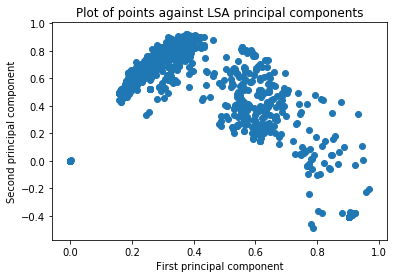

In [23]:
xs = [w[0] for w in dtm_lsa]
ys = [w[1] for w in dtm_lsa]
xs, ys
%pylab inline
import matplotlib.pyplot as plt
figure()
plt.scatter(xs,ys)
xlabel('First principal component')
ylabel('Second principal component')
title('Plot of points against LSA principal components')
show()

In [24]:
print(lsa.explained_variance_ratio_.sum())
print(lsa2.explained_variance_ratio_.sum())
print(lsa3.explained_variance_ratio_.sum())

0.16569265189639926
0.1532839935951959
0.8307027728968338


In [25]:
terms = c.get_feature_names()

for i, comp in enumerate(lsa.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_terms:
        print(t[0])
        print(" ")


Topic 0: 
bryant
 
nba
 
via
 
logo
 
make
 
petition
 
chng
 
new
 
change
 
this
 
Topic 1: 
this
 
my
 
with
 
status
 
me
 
daughter
 
basketball
 
can
 
rip
 
bryant
 
Topic 2: 
bryant
 
pic
 
daughter
 
crash
 
helicopter
 
death
 
rest
 
peace
 
2020
 
killed
 
Topic 3: 
my
 
with
 
me
 
him
 
rest
 
your
 
game
 
peace
 
were
 
player
 


In [26]:
#terms1 = c1.get_feature_names()
#
#for i, comp in enumerate(lsa2.components_):
#    terms_comp1 = zip(terms1, comp)
#    sorted_terms1 = sorted(terms_comp1, key= lambda x:x[1], reverse=True)[:7]
#    print("Topic "+str(i)+": ")
#    for t in sorted_terms1:
#        print(t[0])
#        print(" ")

In [27]:
terms2 = c2.get_feature_names()

for i, comp in enumerate(lsa3.components_):
    terms_comp2 = zip(terms2, comp)
    sorted_terms2 = sorted(terms_comp2, key= lambda x:x[1], reverse=True)[:7]
    print("Topic "+str(i)+": ")
    for t in sorted_terms2:
        print(t[0])
        print(" ")

Topic 0: 
let
 
came
 
top
 
news
 
with
 
them
 
mvp
 
Topic 1: 
came
 
want
 
co
 
photo
 
next
 
comments
 
magic
 
Topic 2: 
them
 
top
 
co
 
comments
 
photo
 
mj
 
want
 
Topic 3: 
news
 
too
 
while
 
mvp
 
with
 
co
 
comments
 
Topic 4: 
top
 
came
 
what
 
with
 
mvp
 
pic
 
loses
 
Topic 5: 
news
 
with
 
came
 
mvp
 
them
 
first
 
team
 
Topic 6: 
with
 
too
 
them
 
jordan
 
other
 
don
 
came
 
Topic 7: 
came
 
mvp
 
news
 
check
 
don
 
pic
 
lebron
 
Topic 8: 
too
 
pic
 
while
 
tt
 
top
 
18
 
dirk
 
Topic 9: 
check
 
18
 
tt
 
most
 
while
 
dirk
 
came
 
Topic 10: 
don
 
lebron
 
came
 
took
 
why
 
top
 
today
 
Topic 11: 
check
 
news
 
pic
 
game
 
old
 
people
 
no
 
Topic 12: 
why
 
full
 
mvp
 
pic
 
ve
 
la
 
game
 
Topic 13: 
what
 
why
 
game
 
100
 
too
 
jordan
 
10
 
Topic 14: 
what
 
la
 
then
 
pau
 
didn
 
owned
 
want
 
Topic 15: 
la
 
most
 
full
 
beef
 
took
 
lebron
 
while
 
Topic 16: 
check
 
while
 
100
 
been
 
wade
 
beef
 
life
 
Topic 17

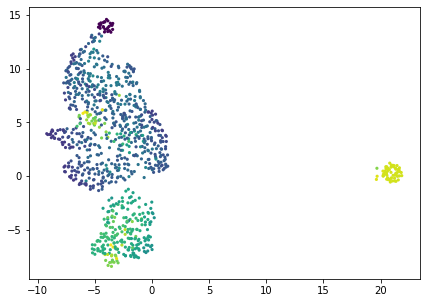

In [28]:
import umap.umap_ as umap

X_topics = lsa.fit_transform(features)
embedding = umap.UMAP(n_neighbors=150, min_dist=1, random_state=5).fit_transform(X_topics)
plt.figure(figsize=(7,5))
plt.scatter(embedding[:, 0], embedding[:, 1], 
s = 10, 
c=xs,# size
edgecolor='none'
)
plt.show()